# **Customer Churn Prediction Analysis**

=== MESSY CUSTOMER DATASET ===
   CustomerID   Age MonthlySpend ContractType Churn
0        C001  25.0         55.0      Monthly     0
1        C002   NaN      9999.99      Monthly     1
2        C003  33.0         40.5      Yearly      0
3        C004  45.0         72.2      Monthly     1
4        C005   NaN         35.0          NaN     0
5        C006  29.0        29.99      monthly     1
6        C007  61.0        105.5       Yearly     0
7        C008   NaN         47.0      Monthly     0
8        C009  34.0        27.75       Yearly     1
9        C010  38.0         3000      Monthly     0
10       C011  27.0          NaN      monthly     1
11       C012  50.0         56.3      Monthly   yes
12       C013  41.0         60.0      Monthly     0
13       C014  37.0         32.8       Yearly     1
14       C015  28.0          NaN       Yearly     0
15       C016  22.0         45.0      Monthly     0
16       C017  55.0         77.2       Yearly     1
17       C018   NaN          NaN 

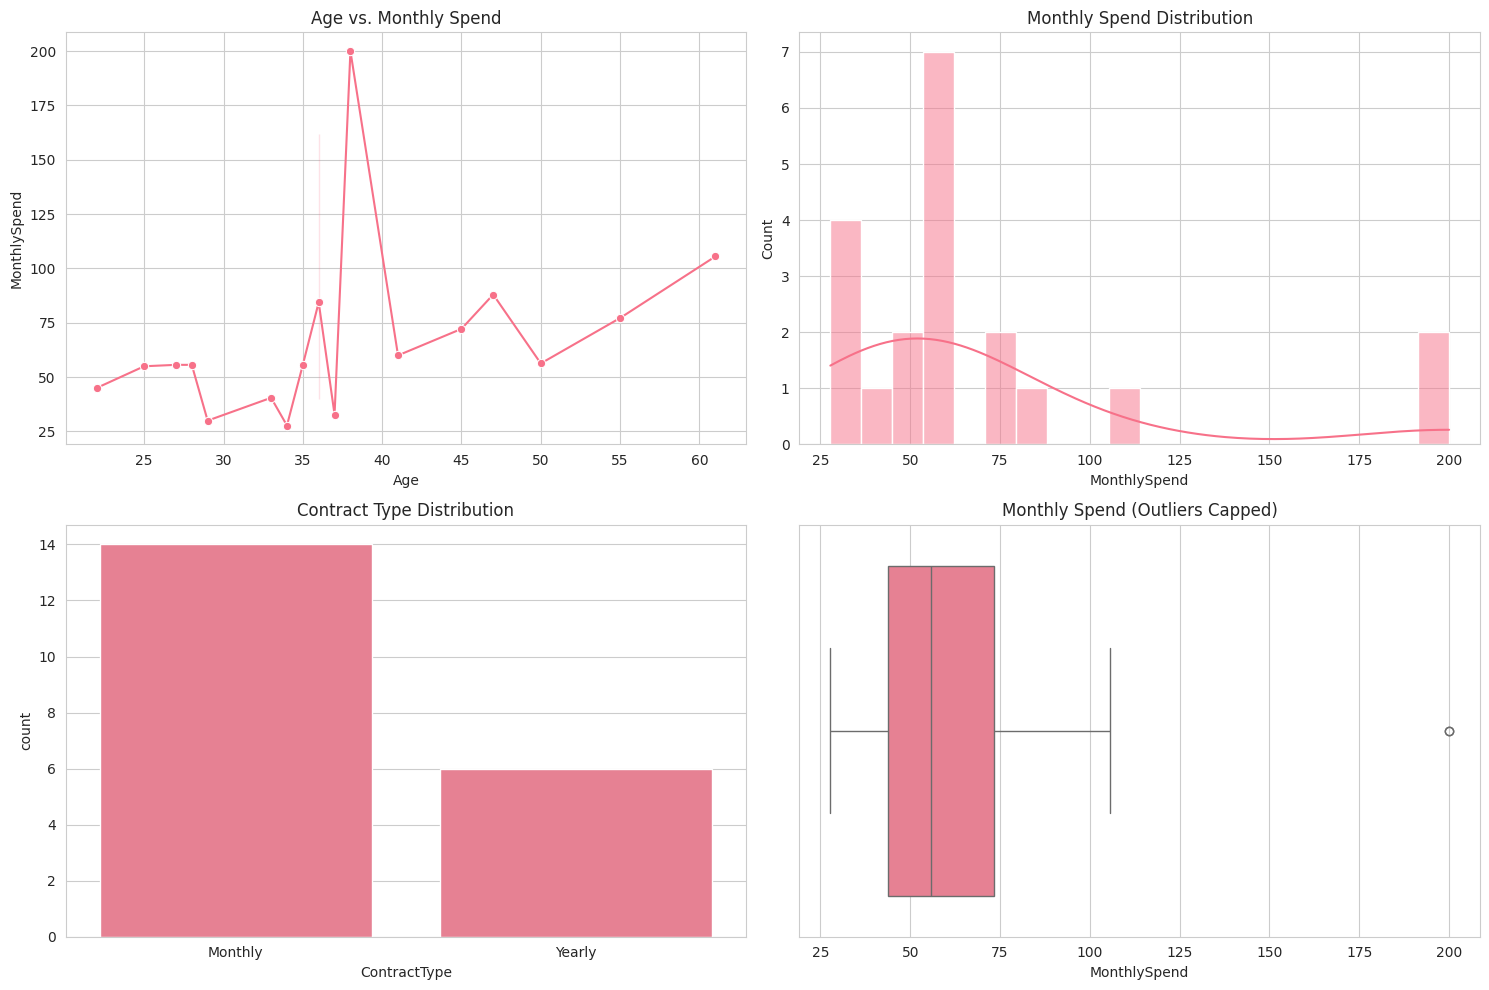


=== MODEL EVALUATION ===
Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.00      0.00      0.00         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6


Feature Coefficients:
               Feature  Coefficient
0                  Age     0.526386
2  ContractType_Yearly    -0.175730
1         MonthlySpend    -0.386102


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# ==============================================
# 1. LOAD AND DISPLAY ORIGINAL DATASET
# ==============================================

# Load directly from your existing CSV file
df = pd.read_csv('messy_customer_dataset.csv')

print("=== MESSY CUSTOMER DATASET ===")
with pd.option_context('display.max_rows', None, 'display.width', 1000):
    print(df)
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# ==============================================
# 2. CLEAN AND TRANSFORM DATA
# ==============================================

# Clean Age (fill missing with median)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Clean MonthlySpend (fix 'thirty' and outliers)
df['MonthlySpend'] = pd.to_numeric(df['MonthlySpend'], errors='coerce')
df['MonthlySpend'] = df['MonthlySpend'].fillna(df['MonthlySpend'].median())
df['MonthlySpend'] = df['MonthlySpend'].clip(upper=200)  # Cap extreme values

# Clean ContractType (standardize formatting)
df['ContractType'] = df['ContractType'].str.strip().str.capitalize()
df['ContractType'] = df['ContractType'].fillna('Monthly')  # Fill missing

# Clean Churn (convert 'yes' to 1)
df['Churn'] = df['Churn'].replace({'yes': 1, 'no': 0}).astype(int)

print("\n=== CLEANED CUSTOMER DATASET ===")
with pd.option_context('display.max_rows', None, 'display.width', 1000):
    print(df)
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# ==============================================
# 3. ORIGINAL VISUALIZATIONS
# ==============================================

plt.figure(figsize=(15, 10))

# Plot 1: Line plot (Age vs. MonthlySpend)
plt.subplot(2, 2, 1)
sns.lineplot(x='Age', y='MonthlySpend', data=df, marker='o')
plt.title('Age vs. Monthly Spend')

# Plot 2: MonthlySpend histogram
plt.subplot(2, 2, 2)
sns.histplot(df['MonthlySpend'], bins=20, kde=True)
plt.title('Monthly Spend Distribution')

# Plot 3: ContractType counts
plt.subplot(2, 2, 3)
sns.countplot(x='ContractType', data=df)
plt.title('Contract Type Distribution')

# Plot 4: MonthlySpend boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x=df['MonthlySpend'])
plt.title('Monthly Spend (Outliers Capped)')

plt.tight_layout()
plt.show()

# ==============================================
# 4. PREDICTIVE MODELING
# ==============================================

# Prepare data
df = pd.get_dummies(df, columns=['ContractType'], drop_first=True)
X = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
print("\n=== MODEL EVALUATION ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
print("\nFeature Coefficients:")
print(pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False))